# Questionario: Centralidade
### Douglas Decicino de Andrade NUSP:10883512

In [20]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

# Rede USAirport

## Calculo da medida eigenvector centrality

In [21]:
#Carregando os dados da rede.
G= nx.read_edgelist(r"data\USairport500.txt", nodetype=int, data=(('weight',float),))

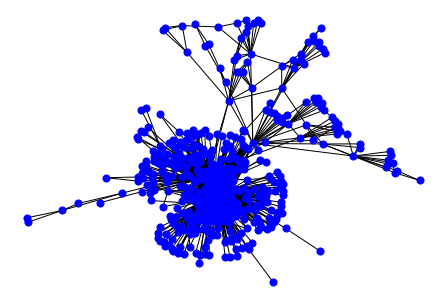

In [23]:
#Plot da rede.
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

Como queremos pegar apenas o componente principal, o código abaixo extrai esse componente da rede para nós, assim como torna a rede não direcional.


In [24]:
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])#Selecionando apenas o maior componente

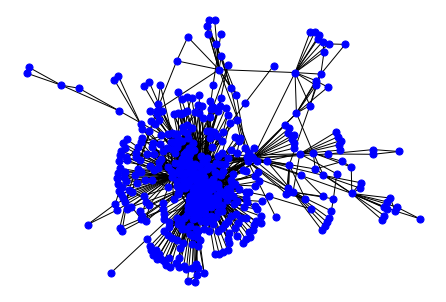

In [25]:
#Plot da rede com a maior componente apenas.
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

Às vezes, os rótulos dos nós não estão na ordem sequencial ou são utilizadas strings. Para facilitar nossa implementação, vamos converter os rótulos em inteiros começando com o índice zero, porque o Python usa indexação baseada em 0.

In [26]:
G = nx.convert_node_labels_to_integers(G, first_label=0)

Vamos ver quantos nós e quantas arestas possuem nossa rede

In [27]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

Number of nodes: 500
Number of edges: 2980


Segue abaixo o código para calcular a aigenvector centrality

In [28]:
EC = dict(nx.eigenvector_centrality(G, max_iter = 1000))
EC = list(EC.values())
av_EC = np.mean(EC)
print('Average eigenvector centrality', av_EC)

Average eigenvector centrality 0.022754398239423695


Portanto a média da medida eigenvector centrality é <b>0.022</b>

# Rede Hamsterster.

## Calculo da correlação de Pearson entre  betweenes centrality e grau.

In [29]:
#Carregando os dados da rede.
G= nx.read_edgelist(r"data\hamsterster.txt", nodetype=int, data=(('weight',float),))

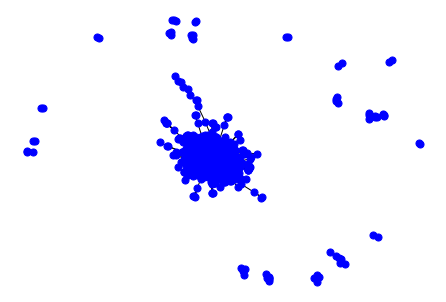

In [30]:
#Plot da rede.
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

Como queremos pegar apenas o componente principal, o código abaixo extrai esse componente da rede para nós, assim como torna a rede não direcional.


In [31]:
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])#Selecionando apenas o maior componente

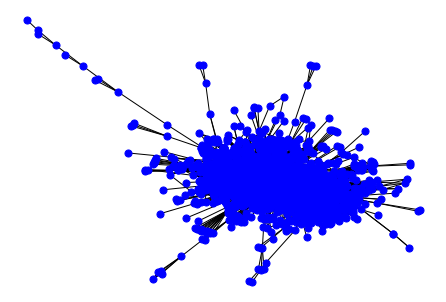

In [32]:
#Plot da rede com a maior componente apenas.
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

Às vezes, os rótulos dos nós não estão na ordem sequencial ou são utilizadas strings. Para facilitar nossa implementação, vamos converter os rótulos em inteiros começando com o índice zero, porque o Python usa indexação baseada em 0.

In [33]:
G = nx.convert_node_labels_to_integers(G, first_label=0)

Vamos ver quantos nós e quantas arestas possuem nossa rede

In [34]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

Number of nodes: 1788
Number of edges: 12476


Segue abaixo o código para calcular a betweenes centrality

In [35]:
# Betweenness centrality
B = dict(nx.betweenness_centrality(G))

Segue abaixo o código para calcular o grau da rede

In [36]:
d = dict(G.degree())

Segue abaixo o gráfico de dispersão e a medida de correlação entre as medidas pedidas

In [37]:
df = pd.DataFrame({'BC':B,'Degree':d})
df

,BC,Degree
0,0.003230,27
1,0.004359,45
2,0.000005,3
3,0.001925,17
4,0.001590,12
...,...,...
1783,0.000930,5
1784,0.000000,2
1785,0.000000,1
1786,0.000022,8


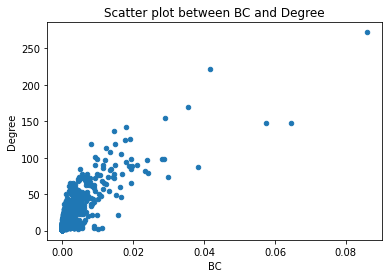

In [38]:
df.plot.scatter(x='BC', y='Degree', title= "Scatter plot between BC and Degree");
plot.show(block=True);

In [39]:
df.corr(method="pearson")

,BC,Degree
BC,1.000000,0.824244
Degree,0.824244,1.000000


Portanto, a correlação entre Betweenes centrality e Grau é <b>0.82</b>

# Rede Jazz 

## Calculo da correlação de Spearman entre closeness centrality e K-core

In [40]:
#Carregando os dados da rede.
G= nx.read_edgelist(r"data\jazz.txt", nodetype=int, data=(('weight',float),))

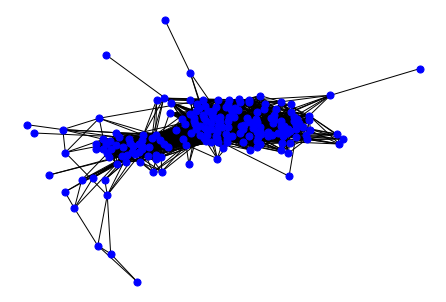

In [41]:
#Plot da rede.
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

Como queremos pegar apenas o componente principal, o código abaixo extrai esse componente da rede para nós, assim como torna a rede não direcional.


In [42]:
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])#Selecionando apenas o maior componente

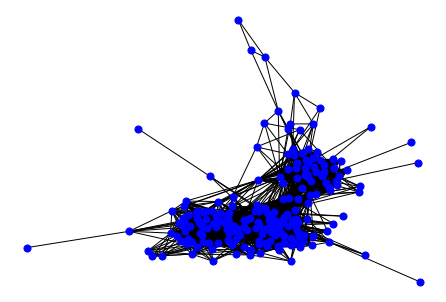

In [43]:
#Plot da rede com a maior componente apenas.
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="b", node_size=50, with_labels=False)

Às vezes, os rótulos dos nós não estão na ordem sequencial ou são utilizadas strings. Para facilitar nossa implementação, vamos converter os rótulos em inteiros começando com o índice zero, porque o Python usa indexação baseada em 0.

In [44]:
G = nx.convert_node_labels_to_integers(G, first_label=0)

Vamos ver quantos nós e quantas arestas possuem nossa rede

In [45]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

Number of nodes: 198
Number of edges: 2742


Segue abaixo o código para calcular a closeness centrality

In [46]:
CLC = dict(nx.closeness_centrality(G))

Segue abaixo o código para calcular a K-core

In [47]:
KC= dict(nx.core_number(G))

Segue abaixo o gráfico de dispersão e a medida de correlação entre as medidas pedidas

In [48]:
df = pd.DataFrame({'CLC':CLC,'K-core':KC})
df

,CLC,K-core
0,0.429194,18
1,0.461358,18
2,0.484029,18
3,0.461358,29
4,0.442697,11
...,...,...
193,0.444695,17
194,0.269863,1
195,0.341421,2
196,0.347443,1


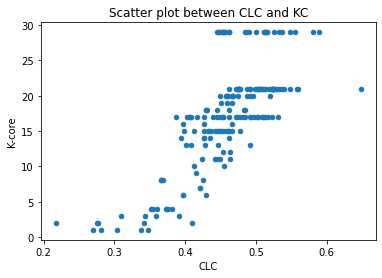

In [49]:
df.plot.scatter(x='CLC', y='K-core', title= "Scatter plot between CLC and KC");

plot.show(block=True);

In [50]:
df.corr(method="spearman")

,CLC,K-core
CLC,1.00000,0.73534
K-core,0.73534,1.00000


Portanto, a correlação entre K-core e Closeness Centrality pela métrica de Spearman é <b>0.73</b>